In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import helpers
import plotly.graph_objects as go
from sklearn.linear_model import RidgeClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [116]:
DATA_FOLDER = 'data/'
DATA_FILE1 = '10101.csv'


In [117]:
file1 = DATA_FOLDER + DATA_FILE1
df = pd.read_csv(file1)


In [118]:
df = helpers.drop_invalid_features(df, max_invalid_ratio=0.5)
df = helpers.standardize(df, ignored=['state'])
df1 = helpers.expand_features_poly(df, max_degree=3, ignored=['state', 'bias'])
df1 = helpers.expand_features_trigonometric(df, columns=['EEGv', 'EMGv'])

X = df.drop(['state'], axis=1)
y = df['state']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

df.head()


,state,EEGv,EMGv
0,3,-0.264251,-0.147730
1,3,-0.288922,-0.088447
2,3,-0.280590,-0.138572
3,3,-0.269822,-0.137917
4,3,-0.275658,-0.004247


In [119]:
X = df1.drop(['state'], axis=1)
y = df1['state']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

Text(0, 0.5, 'EMGv')

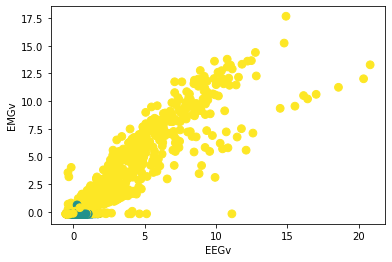

In [120]:
plt.figure()
plt.scatter(X_test['EEGv'], X_test['EMGv'], c=y_test, s=60)
plt.xlabel('EEGv')
plt.ylabel('EMGv')

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:1791: RuntimeWarning: invalid value encountered in reciprocal
  w = ((singvals_sq + alpha) ** -1) - (alpha ** -1)


0.7808333333333334


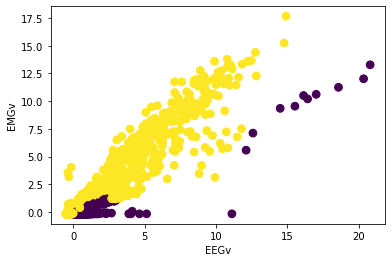

In [121]:

alphas=[1e-3, 1e-2, 1e-1, 1]

clf = RidgeClassifierCV(alphas=alphas).fit(X_train, y_train)

plt.figure()
plt.scatter(X_test['EEGv'], X_test['EMGv'], c=clf.predict(X_test), s=60)
plt.xlabel('EEGv')
plt.ylabel('EMGv')

print(clf.score(X_test, y_test))

0.9150462962962963


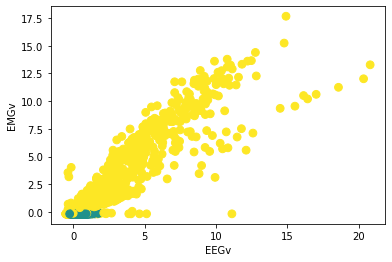

In [122]:
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)
accuracy = knn.score(X_test, y_test)

plt.figure()
plt.scatter(X_test['EEGv'], X_test['EMGv'], c=knn.predict(X_test), s=60)
plt.xlabel('EEGv')
plt.ylabel('EMGv')
print(accuracy)